# Simple Linear Regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is perhaps the most simple of all of the models. Do you remember the linear formula where `m` is the slope and `b` is where the line starts on the y-axis?

$$y=mx+b$$

This is a simple linear model since there is only one coefficient - `mx`.

## Imports and load data

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

In [105]:
df = pd.read_csv("./SalaryData.txt")

In [106]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [107]:
df.shape

(33, 2)

Before continuing, check if there are any missing data in the data set.

In [108]:
df.isnull().values.any()

False

## Splitting data into Test and Train

Splitting the depedent variable (`Salary`) out from the indepedent variable (`YearsExperience`) so we can build our model.

We use the `train_test_split` method from `scikit-learn` to split our data. The `test_size` is used to tell it what percentage of the data to use for our testing data set and the `random_state` is used as a seed for the random splitting of the data. The seed will randomize the split in the same way each time for reproducability.

In [109]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set1, test_set1 = train_test_split(df, test_size=0.2, random_state=18)
train_set2, test_set2 = train_test_split(df, test_size=0.2, random_state=2)
train_set0, test_set0 = train_test_split(df, test_size=0.2, random_state=42)
train_set11, test_set11 = train_test_split(df, test_size=0.2, random_state=18)
train_set22, test_set22 = train_test_split(df, test_size=0.2, random_state=2)

In [110]:
train_set.shape

(26, 2)

In [111]:
train_set1.shape

(26, 2)

In [112]:
train_set2.shape

(26, 2)

In [113]:
train_set.head()

,YearsExperience,Salary
21,6.0,93940.0
12,4.0,56957.0
0,1.1,39343.0
4,2.2,39891.0
16,4.9,67938.0


In [114]:
test_set.head()

,YearsExperience,Salary
31,10.5,121872.0
15,4.5,61111.0
26,8.7,109431.0
17,5.1,66029.0
8,3.2,64445.0


## Exploratory Data Analysis

Explore the data to find trends. Using the `describe` method to get descriptive statistics on numerical columns of our data. The `corr` method to calculate correlations between the columns of our data. And plotting with `matplotlib` via the `plot` method to get a visual of the data. Also using `seaborn`'s `regplot` to give us what a linear regression line of our data may look like and to verify that our data looks linear.

In [115]:
train_set.describe()

,YearsExperience,Salary
count,26.000000,26.000000
mean,5.319231,76046.269231
std,2.929303,28339.605860
min,1.100000,37731.000000
25%,3.050000,56006.000000
50%,4.550000,65578.000000
75%,7.700000,100544.750000
max,10.400000,122391.000000


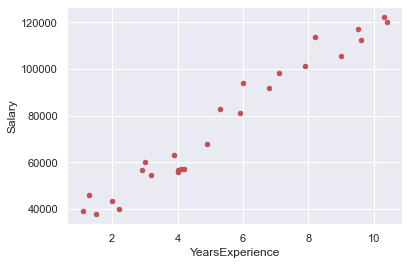

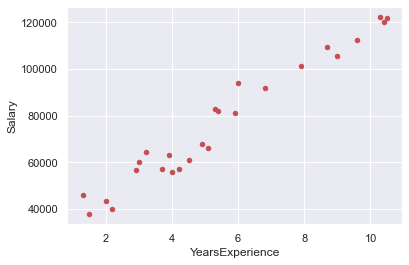

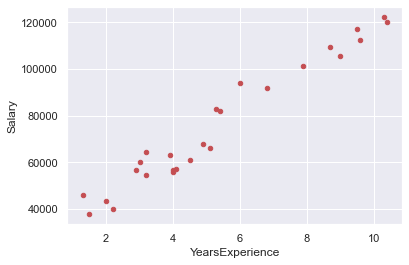

In [117]:
train_set.plot.scatter(x='YearsExperience', y='Salary',c=['r'])
train_set1.plot.scatter(x='YearsExperience', y='Salary',c=['r'])
train_set2.plot.scatter(x='YearsExperience', y='Salary',c=['r'])
#train_set0.plot.scatter(x='YearsExperience', y='Salary',c=['r'])
#train_set11.plot.scatter(x='YearsExperience', y='Salary',c=['r'])
#train_set22.plot.scatter(x='YearsExperience', y='Salary',c=['r'])

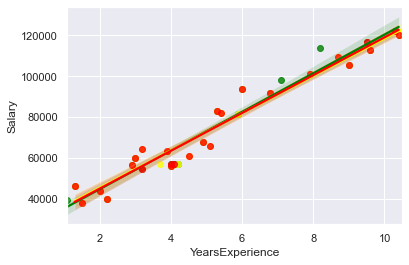

In [118]:
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=train_set, color='green')
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=train_set1, color='yellow')
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=train_set2, color='red')

## Predict

We're making three other data sets for the `LinearRegression` model:
- `test_` that is just the `YearsExperience` column (dropping the `Salary` column) that will be used for analyzing and scoring our model. `test_set` is the full data set after split.
- `train_labels` that is just the `Salary` column to train the `LinearRegression` model what the answers are when passing in the years of experience input.
- `train_set` that is also just the `YearsExperience` column (dropping the `Salary` column) that will be passed into the `LinearRegression`'s `fit` method as the `x` parameter.

In [23]:
test_ = test_set.drop(["Salary"], axis=1)

In [24]:
test_1 = test_set1.drop(["Salary"], axis=1)

In [25]:
test_2 = test_set2.drop(["Salary"], axis=1)

In [26]:
test_.head()

,YearsExperience
31,10.5
15,4.5
26,8.7
17,5.1
8,3.2


In [27]:
test_1.head()

,YearsExperience
12,4.0
7,3.2
13,4.1
28,9.5
23,7.1


In [28]:
test_2.head()

,YearsExperience
31,10.5
14,4.2
23,7.1
9,3.7
25,8.2


In [29]:
train_labels = train_set["Salary"]  #set as regression response value

In [30]:
train_labels1 = train_set1["Salary"]  #set as regression response value

In [31]:
train_labels2 = train_set2["Salary"]  #set as regression response value

In [32]:
train_labels.head()

21    93940.0
12    56957.0
0     39343.0
4     39891.0
16    67938.0
Name: Salary, dtype: float64

In [33]:
train_labels1.head()

20     81363.0
27    105582.0
6      60150.0
21     93940.0
9      57189.0
Name: Salary, dtype: float64

In [34]:
train_labels2.head()

19     82090.0
12     56957.0
1      46205.0
16     67938.0
27    105582.0
Name: Salary, dtype: float64

In [35]:
train_set = train_set.drop(["Salary"], axis=1)

In [36]:
train_set1 = train_set1.drop(["Salary"], axis=1)

In [37]:
train_set2 = train_set2.drop(["Salary"], axis=1)

In [38]:
train_set.head()

,YearsExperience
21,6.0
12,4.0
0,1.1
4,2.2
16,4.9


In [39]:
train_set1.head()

,YearsExperience
20,5.9
27,9.0
6,3.0
21,6.0
9,3.7


In [40]:
train_set2.head()

,YearsExperience
19,5.4
12,4.0
1,1.3
16,4.9
27,9.0


Now that we have our data in the correct form, we pass in the `train_set` and `train_labels` into the `fit` method to train the model.

In [41]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression()

In [42]:
lin_reg1 = LinearRegression()

lin_reg1.fit(train_set1, train_labels1)

LinearRegression()

In [43]:
lin_reg2 = LinearRegression()

lin_reg2.fit(train_set2, train_labels2)

LinearRegression()

Now we have a model and can call the `predict` function on it with inputs. 

In [44]:
salary_pred = lin_reg.predict(test_)

salary_pred

array([125140.84207167,  68282.98488399, 108083.48491537,  73968.77060276,
        55963.78249333,  60701.93725897,  76811.66346214])

In [46]:
salary_pred1 = lin_reg.predict(test_1)

salary_pred1

array([ 63544.83011835,  55963.78249333,  64492.46107148, 115664.53254039,
        92921.38966532,  36063.53247764, 103345.33014973])

In [47]:
salary_pred2 = lin_reg.predict(test_2)

salary_pred2

array([125140.84207167,  65440.09202461,  92921.38966532,  60701.93725897,
       103345.33014973,  81549.81822778,  36063.53247764])

## Analyze Results

We can get the coefficients and intercept from our model.

In [49]:
print("Coefficients data 0: ", lin_reg.coef_)
print("Intercept data 0: ", lin_reg.intercept_)
print("Coefficients data 1: ", lin_reg1.coef_)
print("Intercept1 data 1: ", lin_reg1.intercept_)
print("Coefficients2 data 2: ", lin_reg2.coef_)
print("Intercept2 data 2: ", lin_reg2.intercept_)

Coefficients data 0:  [9476.30953128]
Intercept data 0:  25639.59199323001
Coefficients data 1:  [9149.82832425]
Intercept1 data 1:  26976.323549661764
Coefficients2 data 2:  [9274.62338006]
Intercept2 data 2:  26312.6052763467


With that information we can build our line formula - $y=9476.309x + 25639.591$

We can compare our predictions to our testing set label columns.

In [51]:
#compare predicted and actual salary
print(salary_pred)
print(test_set["Salary"])
print(salary_pred1)
print(test_set1["Salary"])
print(salary_pred2)
print(test_set2["Salary"])


[125140.84207167  68282.98488399 108083.48491537  73968.77060276
  55963.78249333  60701.93725897  76811.66346214]
31    121872.0
15     61111.0
26    109431.0
17     66029.0
8      64445.0
9      57189.0
19     82090.0
Name: Salary, dtype: float64
[ 63544.83011835  55963.78249333  64492.46107148 115664.53254039
  92921.38966532  36063.53247764 103345.33014973]
12     56957.0
7      54445.0
13     57081.0
28    116969.0
23     98273.0
0      39343.0
25    113812.0
Name: Salary, dtype: float64
[125140.84207167  65440.09202461  92921.38966532  60701.93725897
 103345.33014973  81549.81822778  36063.53247764]
31    121872.0
14     57000.0
23     98273.0
9      57189.0
25    113812.0
20     81363.0
0      39343.0
Name: Salary, dtype: float64


### Simple Model Evaluation

We can also evaluate it using `MAE` (mean absolute error), `MSE` (mean squared error), `RMSE` (root mean square error).

`MAE` represents average error. 
`MSE` is similar to `MAE` but larger errors are exaggerated more due the square function. The squared values make it much larger than the original units.
`RMSE` is the square root of `MSE`. 

Models in `scikit-learn` have a `score` method. Depending on the model, this method will do a different calculation. For `LinearRegression` it calculates the $r^2$.

In [68]:
from sklearn import metrics
#Data 0 
print("1.\nMAE Data 0 :", metrics.mean_absolute_error(test_set["Salary"],salary_pred))
print("MSE Data 0 :", metrics.mean_squared_error(test_set["Salary"],salary_pred))
print("RMSE Data 0 :", np.sqrt(metrics.mean_squared_error(test_set["Salary"],salary_pred)))
print("r(corr) :", lin_reg.score(test_, test_set["Salary"]))
print("r(square) :", r2_score(test_set["Salary"], salary_pred))
#Data 1 
print("2.\nMAE Data 1 :", metrics.mean_absolute_error(test_set1["Salary"],salary_pred1))
print("MSE Data 1 :" , metrics.mean_squared_error(test_set1["Salary"],salary_pred1))
print("RMSE Data 1 :", np.sqrt(metrics.mean_squared_error(test_set1["Salary"],salary_pred1)))
print("r(corr) :", lin_reg1.score(test_1, test_set1["Salary"]))
print("r(square) :", r2_score(test_set1["Salary"], salary_pred1))
#Data 2 
print("3.\nMAE Data 1 :", metrics.mean_absolute_error(test_set2["Salary"],salary_pred2))
print("MSE Data 1 :" , metrics.mean_squared_error(test_set2["Salary"],salary_pred2))
print("RMSE Data 1 :", np.sqrt(metrics.mean_squared_error(test_set2["Salary"],salary_pred2)))
print("r(corr) :", lin_reg2.score(test_2, test_set2["Salary"]))
print("r(square) :", r2_score(test_set2["Salary"], salary_pred2))

1.
MAE Data 0 : 5285.80056379283
MSE Data 0 : 34158723.56875228
RMSE Data 0 : 5844.546481015638
r(corr) : 0.9392722746799265
r(square) : 0.9392722746799265
2.
MAE Data 1 : 5131.469835726059
MSE Data 1 : 35897630.665232845
RMSE Data 1 : 5991.463148950584
r(corr) : 0.9516755318910548
r(square) : 0.9590063213453132
3.
MAE Data 1 : 4929.491041477399
MSE Data 1 : 34748847.03830582
RMSE Data 1 : 5894.815267530088
r(corr) : 0.9561100318820074
r(square) : 0.9589355274882074


There's also a separate `r2_score` method that will calculate the $r^2$. It is a goodness of fit measure. Higher value is generally better. We will discuss this later. 

In [64]:
r2_score(test_set["Salary"], salary_pred)

0.9392722746799265

### Plot Prediction

We can also plot our test data as a scatter plot and, with our predicted salary that we got from our model, plot a line to see how well it fits the data.

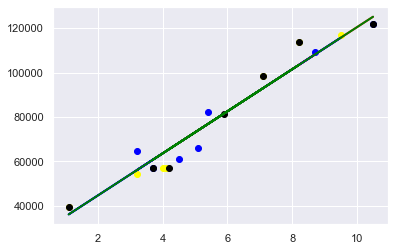

In [88]:
plt.scatter(test_set["YearsExperience"], test_set["Salary"], color='blue')
plt.plot(test_set["YearsExperience"], salary_pred, color='red', linewidth=2)

plt.scatter(test_set1["YearsExperience"], test_set1["Salary"], color='yellow')
plt.plot(test_set1["YearsExperience"], salary_pred1, color='blue', linewidth=2)

plt.scatter(test_set2["YearsExperience"], test_set2["Salary"], color='black')
plt.plot(test_set2["YearsExperience"], salary_pred2, color='green', linewidth=2)

We can also plot the regression line directly from the equation obtained earlier: $y=9476.309x + 25639.591$

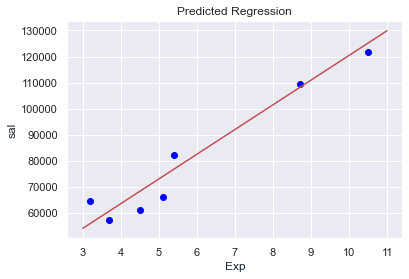

In [89]:
x = np.linspace(3,11,40)
#x = 8
y = 9476.309*x+25639.7
y1 = 9270.53752187*x+25588.268626329256
y2 = 9307.15886141*x+26200.131157339885
plt.scatter(test_set["YearsExperience"], test_set["Salary"], color='blue')
plt.plot(x, y, '-r', label='Reg Line')
plt.title('Predicted Regression')
plt.xlabel('Exp', color='#1C2833')
plt.ylabel('sal', color='#1C2833')
plt.show()

### Question
1. What is the predicted salary of somebody with 8 years of experience? Where did you obtain the prediction from?

Re-run the regression 2 more times with different train-test split. Plot the 3 linear regression line together. 
1. What can say about the 3 regression lines?
1. What is predicted salary for 8 years of experience for all 3 regression?
1. Are the predicted values similar?
1. Can you explain your answer in question (1&2) above? That is explain why the answers are similar (or not similar) after doing a separate train-test split.


In [91]:
# 1. Based on the predicted salary (original random seed= 42), somebody with 8 years experience will obtain 100000 above see the below 
y = 9476.309*x+25639.7
x = 8
print("salary", str(y))

#the regression function obtain from the first model. Set x=8 into the function. 

salary 101450.17199999999


From the results of the 3 lines for the regression prediction,
it can be seen that the lines overlap with each other,
so this gives the result that the variation in the value of the data points taken 
does not give a significant change to the model formed, so that the resulting model is suitable for any data point


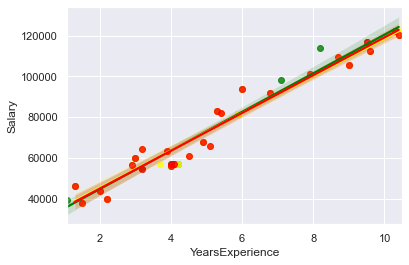

In [125]:
#2 

#1.What can say about the 3 regression lines? 
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=train_set0, color='green')
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=train_set11, color='yellow')
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=train_set22, color='red')
print("From the results of the 3 lines for the regression prediction,\nit can be seen that the lines overlap with each other,\nso this gives the result that the variation in the value of the data points taken \ndoes not give a significant change to the model formed, so that the resulting model is suitable for any data point")

In [ ]:
#From the results of the 3 lines for the regression prediction, it can be seen that the lines overlap with each other, so this gives the result that the variation in the value of the data points taken does not give a significant change to the model formed. so that the resulting model is suitable for any data point

In [128]:
# 2. What is predicted salary for 8 years of experience for all 3 regression?
#9476.309*x+25639.7
y = (lin_reg.coef_)*x+(lin_reg.intercept_)
x = 8
print("1. salary dataset 0: ", y)

y = (lin_reg1.coef_)*x+(lin_reg1.intercept_)
x = 8
print("2. salary dataset 1: ", str(y))

y = (lin_reg2.coef_)*x+(lin_reg2.intercept_)
x = 8
print("3. salary dataset 2: ", str(y))


1. salary dataset 0:  [101450.06824347]
2. salary dataset 1:  [100174.95014369]
3. salary dataset 2:  [100509.59231686]


From answer number 2 it can be seen that the results are almost the same and at the same rate,
the plot results below also show overlapping results for the 3 regression lines obtained.


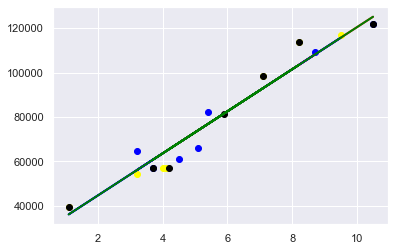

In [131]:
#3. Are the predicted values similar?
plt.scatter(test_set["YearsExperience"], test_set["Salary"], color='blue')
plt.plot(test_set["YearsExperience"], salary_pred, color='red', linewidth=2)

plt.scatter(test_set1["YearsExperience"], test_set1["Salary"], color='yellow')
plt.plot(test_set1["YearsExperience"], salary_pred1, color='blue', linewidth=2)

plt.scatter(test_set2["YearsExperience"], test_set2["Salary"], color='black')
plt.plot(test_set2["YearsExperience"], salary_pred2, color='green', linewidth=2)

print("From answer number 2 it can be seen that the results are almost the same and at the same rate,\nthe plot results below also show overlapping results for the 3 regression lines obtained.")

In [132]:
# 4. Can you explain your answer in question (1&2) above? That is explain why the answers are similar (or not similar) after doing a separate train-test split.
from sklearn import metrics
#Data 0 
print("1.\nMAE Data 0 :", metrics.mean_absolute_error(test_set["Salary"],salary_pred))
print("MSE Data 0 :", metrics.mean_squared_error(test_set["Salary"],salary_pred))
print("RMSE Data 0 :", np.sqrt(metrics.mean_squared_error(test_set["Salary"],salary_pred)))
print("r(corr) :", lin_reg.score(test_, test_set["Salary"]))
print("r(square) :", r2_score(test_set["Salary"], salary_pred))
#Data 1 
print("2.\nMAE Data 1 :", metrics.mean_absolute_error(test_set1["Salary"],salary_pred1))
print("MSE Data 1 :" , metrics.mean_squared_error(test_set1["Salary"],salary_pred1))
print("RMSE Data 1 :", np.sqrt(metrics.mean_squared_error(test_set1["Salary"],salary_pred1)))
print("r(corr) :", lin_reg1.score(test_1, test_set1["Salary"]))
print("r(square) :", r2_score(test_set1["Salary"], salary_pred1))
#Data 2 
print("3.\nMAE Data 1 :", metrics.mean_absolute_error(test_set2["Salary"],salary_pred2))
print("MSE Data 1 :" , metrics.mean_squared_error(test_set2["Salary"],salary_pred2))
print("RMSE Data 1 :", np.sqrt(metrics.mean_squared_error(test_set2["Salary"],salary_pred2)))
print("r(corr) :", lin_reg2.score(test_2, test_set2["Salary"]))
print("r(square) :", r2_score(test_set2["Salary"], salary_pred2))

1.
MAE Data 0 : 5285.80056379283
MSE Data 0 : 34158723.56875228
RMSE Data 0 : 5844.546481015638
r(corr) : 0.9392722746799265
r(square) : 0.9392722746799265
2.
MAE Data 1 : 5131.469835726059
MSE Data 1 : 35897630.665232845
RMSE Data 1 : 5991.463148950584
r(corr) : 0.9516755318910548
r(square) : 0.9590063213453132
3.
MAE Data 1 : 4929.491041477399
MSE Data 1 : 34748847.03830582
RMSE Data 1 : 5894.815267530088
r(corr) : 0.9561100318820074
r(square) : 0.9589355274882074


In [ ]:
The results of the three regressions have low variance among them. 
can be seen from the results obtained accuracy and also the correlation value. 
The performance value between one data and another is in the same range. 
whereas for the bias value, it shows low results too, because the accuracy value is quite high, 
this shows that the actual Y and Y predict values 
are not much different.

Low Accuracy and Low Bias. 